In [0]:
import pandas as pd
import numpy as np
import datetime as dt

In [0]:
tr1=pd.read_csv('/content/drive/My Drive/Codehub Project/data/transactions_1.csv')
tr2=pd.read_csv('/content/drive/My Drive/Codehub Project/data/transactions_2.csv')
tr3=pd.read_csv('/content/drive/My Drive/Codehub Project/data/transactions_3.csv')

In [125]:
tr=pd.DataFrame()
tr=tr.append(tr1)
tr=tr.append(tr2)
tr=tr.append(tr3)
tr.columns

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

#Transactions

In [126]:
trans=tr.drop(columns=["transaction_id","transactions_currency","ea_cardholderpresence","ea_merchant_city","ea_merchant_country","ea_merchant_mcc"])
trans.columns

Index(['transactions_type', 'amount_usd', 'transactions_state', 'direction',
       'user_id', 'created_date'],
      dtype='object')

In [127]:
print(trans.shape)
trans=trans[(trans.transactions_state=="COMPLETED")&(trans.amount_usd<2.5*10**6)]

#(trans.direction=="OUTBOUND")&(trans.transactions_state=="COMPLETED")&

trans=trans.drop(columns=["direction","transactions_state"])
trans.shape

(2181026, 6)


(1916387, 4)

In [0]:
trans["date_created"] = [dt.datetime.strptime(d,"%Y-%m-%d  %H:%M:%S.%f") for d in trans["created_date"]]
trans["year_created"] =trans["date_created"].dt.year
trans["month_created"] =trans["date_created"].dt.month
trans["Q_created"] =trans["date_created"].dt.quarter

In [129]:
trans=trans.drop(columns="created_date")
print(trans.columns)
trans.sample(10)

Index(['transactions_type', 'amount_usd', 'user_id', 'date_created',
       'year_created', 'month_created', 'Q_created'],
      dtype='object')


,transactions_type,amount_usd,user_id,date_created,year_created,month_created,Q_created
82137,CARD_PAYMENT,9.87,user_10802,2018-06-29 15:20:51.156602,2018,6,2
179868,TOPUP,32.23,user_1196,2019-02-10 14:54:07.974449,2019,2,1
41571,CASHBACK,0.04,user_12683,2019-03-09 06:18:49.723187,2019,3,1
442114,CARD_PAYMENT,3.83,user_11911,2018-04-13 08:47:52.060378,2018,4,2
566316,CASHBACK,0.02,user_5927,2018-09-17 00:42:19.369420,2018,9,3
709996,TRANSFER,9.54,user_2847,2019-02-18 04:04:14.363706,2019,2,1
317087,TRANSFER,0.85,user_9340,2018-10-06 19:30:50.739721,2018,10,4
133345,TOPUP,500.00,user_4189,2018-10-28 06:34:50.751991,2018,10,4
152031,TOPUP,85.11,user_13791,2018-09-27 04:18:48.536698,2018,9,3
251571,CARD_PAYMENT,21.43,user_14627,2019-02-09 03:42:56.948560,2019,2,1


# Churn


In [0]:
test5=trans.pivot_table(values='amount_usd',index='user_id',aggfunc=['sum','count'],margins=True)
test5=pd.DataFrame(test5.to_records())
test5=test5.rename(columns={"('sum', 'amount_usd')":"total sum","('count', 'amount_usd')":"total count"})
test5=round(test5,1)
columns={"('All', '')":"Total"}

In [166]:
test5

,user_id,total sum,total count
0,user_0,6925.1,520
1,user_1,12955.5,133
2,user_10,5438.9,123
3,user_100,4230.1,55
4,user_1000,843.1,43
...,...,...,...
14817,user_9996,1681.8,31
14818,user_9997,7650.5,128
14819,user_9998,520.7,30
14820,user_9999,8.5,1


In [0]:
last_date=max(trans.date_created)

d_last_tr=trans.pivot_table(index="user_id",values="date_created",aggfunc="max")
d_last_tr=pd.DataFrame(d_last_tr.to_records())

d_last_tr["days_last_trans"]=(last_date-d_last_tr.date_created).dt.days

In [168]:
d_last_tr=d_last_tr.drop('date_created',1)
d_last_tr

,user_id,days_last_trans
0,user_0,5
1,user_1,11
2,user_10,4
3,user_100,80
4,user_1000,10
...,...,...
14816,user_9995,14
14817,user_9996,127
14818,user_9997,18
14819,user_9998,61


In [172]:
test6=pd.merge(test5,d_last_tr,on='user_id',how='left')
test6

,user_id,total sum,total count,days_last_trans
0,user_0,6925.1,520,5.0
1,user_1,12955.5,133,11.0
2,user_10,5438.9,123,4.0
3,user_100,4230.1,55,80.0
4,user_1000,843.1,43,10.0
...,...,...,...,...
14817,user_9996,1681.8,31,127.0
14818,user_9997,7650.5,128,18.0
14819,user_9998,520.7,30,61.0
14820,user_9999,8.5,1,5.0


In [0]:
test6=test6[:-1]

In [174]:
test6


,user_id,total sum,total count,days_last_trans
0,user_0,6925.1,520,5.0
1,user_1,12955.5,133,11.0
2,user_10,5438.9,123,4.0
3,user_100,4230.1,55,80.0
4,user_1000,843.1,43,10.0
...,...,...,...,...
14816,user_9995,239.8,4,14.0
14817,user_9996,1681.8,31,127.0
14818,user_9997,7650.5,128,18.0
14819,user_9998,520.7,30,61.0


In [0]:
test6=test6.drop(columns=['user_id'])

In [176]:
test6

,total sum,total count,days_last_trans
0,6925.1,520,5.0
1,12955.5,133,11.0
2,5438.9,123,4.0
3,4230.1,55,80.0
4,843.1,43,10.0
...,...,...,...
14816,239.8,4,14.0
14817,1681.8,31,127.0
14818,7650.5,128,18.0
14819,520.7,30,61.0


In [177]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = sc.fit_transform(test6.values)

a=[]
sscore=[]
for k in range(2,21):
    kmeans = KMeans(n_clusters = k, n_init=30, random_state=42)
    kmeans.fit(X)
    clusters = kmeans.predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    a.append(k)
    sscore.append(silhouette_avg)
    print("For k =", k, "The average silhouette_score is :", silhouette_avg)

For k = 2 The average silhouette_score is : 0.7054050444170867
For k = 3 The average silhouette_score is : 0.6344354094376299
For k = 4 The average silhouette_score is : 0.62042741999264
For k = 5 The average silhouette_score is : 0.6039729799611093
For k = 6 The average silhouette_score is : 0.5429657812571006
For k = 7 The average silhouette_score is : 0.5561513055416264
For k = 8 The average silhouette_score is : 0.5515246024880956
For k = 9 The average silhouette_score is : 0.5234788310483444
For k = 10 The average silhouette_score is : 0.5120969237806974
For k = 11 The average silhouette_score is : 0.49246488806639127
For k = 12 The average silhouette_score is : 0.4897470355276887
For k = 13 The average silhouette_score is : 0.4650715433985623
For k = 14 The average silhouette_score is : 0.46179500553044944
For k = 15 The average silhouette_score is : 0.46370948203165135
For k = 16 The average silhouette_score is : 0.465600474655589
For k = 17 The average silhouette_score is : 0.4

Text(0.5, 1.0, 'Silhouette scores for different values of k')

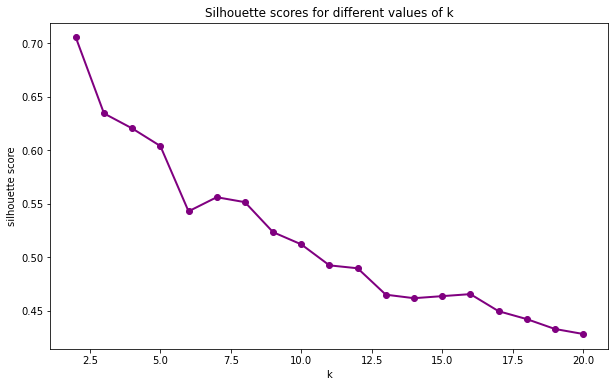

In [178]:
fig = plt.figure(figsize=(10, 6))

plt.plot(a,sscore,c='purple',marker='o',linewidth=2)
plt.xlabel('k') 
plt.ylabel('silhouette score')
plt.title('Silhouette scores for different values of k')

In [179]:
k_u = 2
kmeans_cust = KMeans(n_clusters = k_u, n_init=30, random_state=42)
cust_clusters = kmeans_cust.fit_predict(X)

centroids = sc.inverse_transform(np.array(kmeans_cust.cluster_centers_))

test=pd.DataFrame(centroids, columns=test6.columns)
test=round(test,2)
test

,total sum,total count,days_last_trans
0,10077.64,156.73,27.28
1,1349.58,18.74,254.23


In [180]:
test=test6
test["Clusters"]=cust_clusters
test.Clusters.value_counts()

0    11875
1     2946
Name: Clusters, dtype: int64